# Distance plot

In [ ]:
!pip install -U scikit-learn

In [1]:
#!pip install -U scikit-learn
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [30]:
tools_ref = ['bbh', 'domainoid', 'ensamble', 'hieranoid', 'inparanoid', 'metaphors', 'oma_pairs', 'orthoffgc', 'orthofinder', 'orthoinspector', 'panther', 'rsd', 'sonicparanoid']
tools = ['busco_metazoa_augustus_gallus_v2', 'fdog_assembly_metazoa_augustus_gallus_v2', 'busco_metazoa_metaeuk_gallus_v2', 'fdog_assembly_metazoa_metaeuk_gallus_v2']
path = '../../results/qfo_input/'
all_pairs = set()

In [31]:
def create_set_of_pairs(path, all_pairs):
    file = open(path, 'r')
    pairs_set = set()
    lines = file.readlines()
    for line in lines:
        line = line.rstrip()
        pairs = '_'.join(sorted(line.split('\t')))
        pairs_set.add(pairs)
        all_pairs.add(pairs)
    #print(len(lines))
    #print(len(pairs_set))
    return pairs_set, all_pairs

In [32]:
list_of_sets_ref = []
dict_of_sets = {}
for i in tools_ref:
    pairs_set, all_pairs = create_set_of_pairs(path + i + '.tsv', all_pairs)
    list_of_sets_ref.append(pairs_set)
    dict_of_sets[i] = pairs_set

In [33]:
list_of_sets = []
for t in tools:
    print(t)
    pairs_set, all_pairs = create_set_of_pairs(path + t + '.tsv', all_pairs)
    list_of_sets.append(pairs_set)
    dict_of_sets[t] = pairs_set

busco_metazoa_augustus_gallus_v2
fdog_assembly_metazoa_augustus_gallus_v2
busco_metazoa_metaeuk_gallus_v2
fdog_assembly_metazoa_metaeuk_gallus_v2


# Create matrix

In [34]:
all_tools = tools + tools_ref
df = pd.DataFrame(index=list(all_pairs), columns=list(all_tools))

In [35]:
def fill_df(df, dict_of_sets):
    for tool in dict_of_sets:
        for pair in dict_of_sets[tool]:
            df.loc[pair,tool] = 1
    return df.fillna(0)

In [36]:
df = fill_df(df, dict_of_sets)
df = df.transpose()

/tmp/ipykernel_3930945/4043747138.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df.fillna(0)


In [37]:
display(df)

,G5EFC4_Q99459,B1H3A5_Q9NX55,Q9ULC4_Q9W445,B7CED6_Q13099,Q9HBG6_T1G248,A0A8I6A7W4_Q9VBU4,D3ZA68_Q96RR1,Q8T481_Q8WTM8,Q95SX8_Q9H7X0,P63272_Q9TZ93,...,F1LYQ7_P62906,P61513_Q9VMU4,D6WSM3_P52434,A0A6I8RDP7_Q9H6Y2,A7RNK3_Q96CS3,Q568H9_Q9Y324,P78549_Q28J05,Q99460_Q9VW54,O15541_Q5PPN1,Q5ZM16_Q9NW64
busco_metazoa_augustus_gallus_v2,0,1,1,0,1,0,1,0,1,1,...,1,1,1,0,0,1,1,0,1,0
fdog_assembly_metazoa_augustus_gallus_v2,1,1,1,0,1,0,1,0,1,1,...,0,1,1,0,0,1,1,0,0,0
busco_metazoa_metaeuk_gallus_v2,1,1,1,0,1,0,1,1,1,1,...,1,1,1,0,0,1,1,0,1,0
fdog_assembly_metazoa_metaeuk_gallus_v2,1,1,1,0,1,0,1,0,1,1,...,0,1,1,0,0,1,1,0,0,0
bbh,1,1,1,0,1,0,1,0,1,1,...,0,1,1,0,0,1,1,0,0,1
domainoid,1,1,1,0,1,0,1,0,1,1,...,0,1,1,0,0,1,1,0,1,1
ensamble,1,1,1,0,1,0,1,1,1,1,...,1,0,1,0,0,1,1,1,1,0
hieranoid,1,1,1,0,1,1,1,0,1,1,...,0,1,1,0,0,1,1,0,0,1
inparanoid,1,1,1,0,1,0,1,0,1,1,...,0,1,1,0,0,1,1,0,0,1
metaphors,1,1,0,1,1,1,1,1,1,1,...,0,0,1,1,0,1,1,0,0,1


## TSNE

In [38]:
df_embedded = TSNE(n_components=2, random_state=42, perplexity=2).fit_transform(df)
print(df_embedded)

[[-60.926857  103.82167  ]
 [-46.84631   153.67271  ]
 [-55.72998   123.619095 ]
 [-51.393555  139.18634  ]
 [-33.345062  -12.006589 ]
 [  2.950273  -25.037834 ]
 [-72.24993    -7.704545 ]
 [ 57.037426   20.009394 ]
 [ 62.367455    7.9047704]
 [-60.74301   -83.405106 ]
 [ 82.328735    4.224688 ]
 [-22.144085  -46.14189  ]
 [-52.760555  -65.235954 ]
 [-36.01871   -28.25029  ]
 [ 19.534143  -36.269123 ]
 [-30.646164    7.933829 ]
 [-50.456932  -33.548344 ]]


In [39]:
df_embedded.shape

results = pd.DataFrame()
results['tools'] = all_tools
results["PC1"] = df_embedded[:,0]
results["PC2"] = df_embedded[:,1]
print(results)

                                       tools        PC1         PC2
0           busco_metazoa_augustus_gallus_v2 -60.926857  103.821671
1   fdog_assembly_metazoa_augustus_gallus_v2 -46.846310  153.672714
2            busco_metazoa_metaeuk_gallus_v2 -55.729980  123.619095
3    fdog_assembly_metazoa_metaeuk_gallus_v2 -51.393555  139.186340
4                                        bbh -33.345062  -12.006589
5                                  domainoid   2.950273  -25.037834
6                                   ensamble -72.249931   -7.704545
7                                  hieranoid  57.037426   20.009394
8                                 inparanoid  62.367455    7.904770
9                                  metaphors -60.743011  -83.405106
10                                 oma_pairs  82.328735    4.224688
11                                 orthoffgc -22.144085  -46.141891
12                               orthofinder -52.760555  -65.235954
13                            orthoinspector -36

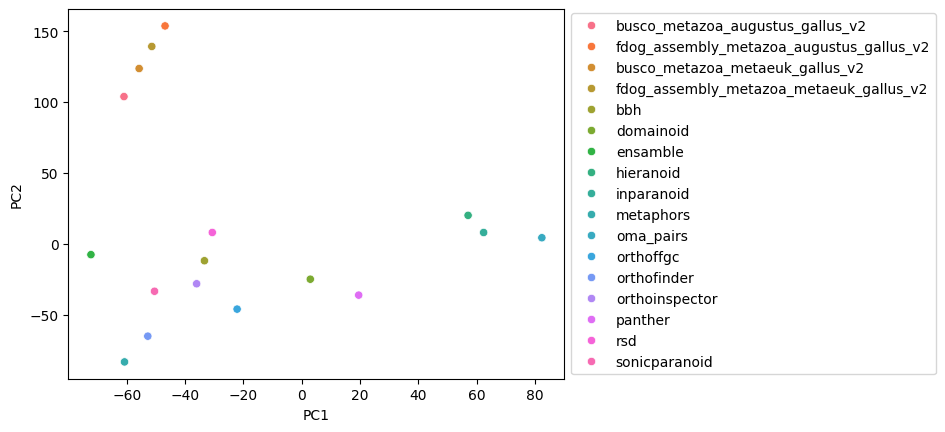

In [40]:
fig = sb.scatterplot(data=results, x="PC1", y="PC2", hue='tools')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## PCA

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_embedded = pca.fit_transform(df_embedded)

In [42]:
results = pd.DataFrame()
results['tools'] = all_tools
results["PC1"] = df_embedded[:,0]
results["PC2"] = df_embedded[:,1]
print(results)

                                       tools         PC1        PC2
0           busco_metazoa_augustus_gallus_v2   96.463890 -23.582043
1   fdog_assembly_metazoa_augustus_gallus_v2  143.007782  -0.843164
2            busco_metazoa_metaeuk_gallus_v2  115.018318 -14.940341
3    fdog_assembly_metazoa_metaeuk_gallus_v2  129.563614  -7.899169
4                                        bbh  -22.425575 -17.082899
5                                  domainoid  -41.716236  16.309235
6                                   ensamble  -11.259347 -54.598381
7                                  hieranoid   -7.028667  77.558273
8                                 inparanoid  -19.889370  80.645866
9                                  metaphors  -87.798790 -56.765862
10                                 oma_pairs  -27.067743  99.631836
11                                 orthoffgc  -58.010551 -12.144292
12                               orthofinder  -71.342995 -45.673355
13                            orthoinspector  -3

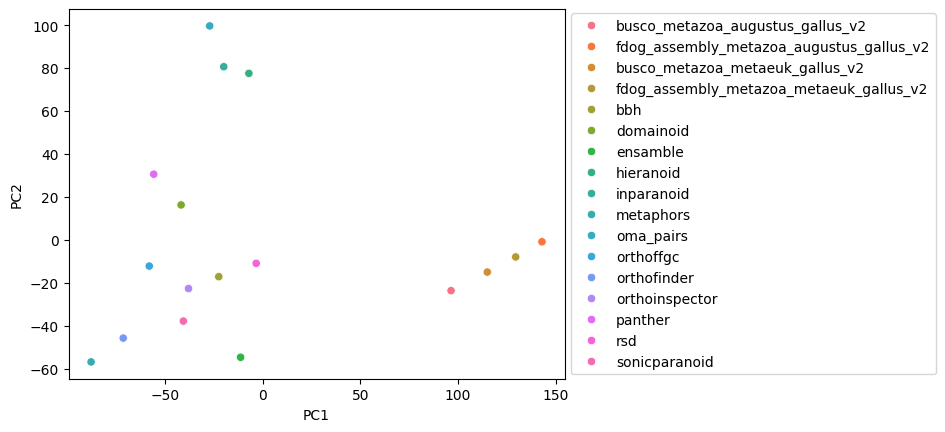

In [43]:
fig = sb.scatterplot(data=results, x="PC1", y="PC2", hue='tools')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# MDS

In [44]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances

In [45]:
mds = MDS(random_state=0)
df_embedded = mds.fit_transform(df)
print(df_embedded)

[[-23.07980696  29.45471111]
 [ 10.48545541  28.00083529]
 [ 23.34143143  17.64041153]
 [  0.06556864  30.42310814]
 [ -4.92891906  -8.19633993]
 [ -0.52495291   4.81450654]
 [-15.19145572 -38.13680312]
 [-17.89327827   3.08436451]
 [-11.82617264   6.08079425]
 [ 34.72428635 -11.67834596]
 [-29.95578717  -2.10660625]
 [ 16.03084935   4.09059118]
 [ 14.66316814 -13.17564477]
 [  1.75587997  -3.87442119]
 [  8.12876983 -25.58633026]
 [-13.84647365 -15.37125663]
 [  8.05143726  -5.46357445]]


                                       tools        PC1        PC2
0           busco_metazoa_augustus_gallus_v2 -23.079807  29.454711
1   fdog_assembly_metazoa_augustus_gallus_v2  10.485455  28.000835
2            busco_metazoa_metaeuk_gallus_v2  23.341431  17.640412
3    fdog_assembly_metazoa_metaeuk_gallus_v2   0.065569  30.423108
4                                        bbh  -4.928919  -8.196340
5                                  domainoid  -0.524953   4.814507
6                                   ensamble -15.191456 -38.136803
7                                  hieranoid -17.893278   3.084365
8                                 inparanoid -11.826173   6.080794
9                                  metaphors  34.724286 -11.678346
10                                 oma_pairs -29.955787  -2.106606
11                                 orthoffgc  16.030849   4.090591
12                               orthofinder  14.663168 -13.175645
13                            orthoinspector   1.755880  -3.87

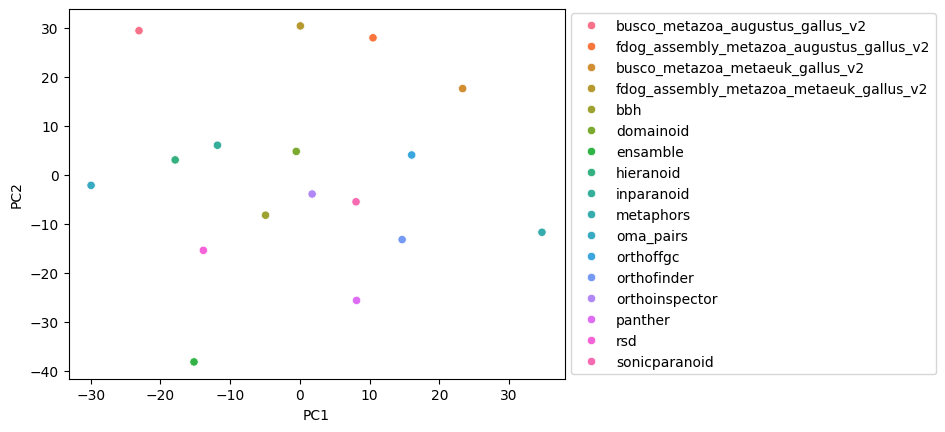

In [46]:
results = pd.DataFrame()
results['tools'] = all_tools
results["PC1"] = df_embedded[:,0]
results["PC2"] = df_embedded[:,1]
print(results)

fig = sb.scatterplot(data=results, x="PC1", y="PC2", hue='tools')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [47]:
#with euklidian distance
dist_euclid = euclidean_distances(df)
print(dist_euclid)
print(len(dist_euclid))
mds_eu = MDS(dissimilarity='precomputed', random_state=0)
# Get the embeddings
df_embedded = mds_eu.fit_transform(dist_euclid)

[[ 0.         42.22558466 41.01219331 45.44227107 41.50903516 43.12771731
  55.34437641 44.79955357 44.13615298 51.30302135 47.85394446 42.43819035
  44.62062303 41.89272013 47.14870094 44.64302857 43.06971093]
 [42.22558466  0.         39.81205847 33.28663395 36.79673899 37.40320842
  50.33885179 39.39543121 38.301436   47.33920151 41.98809355 39.03844259
  40.04996879 36.138622   42.33202098 39.29376541 38.13135193]
 [41.01219331 39.81205847  0.         33.30165161 34.94281042 36.05551275
  51.01960408 38.79432948 38.31448812 45.7383865  43.24349662 36.48287269
  36.97296309 34.62657939 40.48456496 38.71692137 35.17101079]
 [45.44227107 33.28663395 33.30165161  0.         37.97367509 38.249183
  50.6359556  40.59556626 39.7617907  47.08502947 43.8520239  40.04996879
  39.7743636  36.98648402 43.52011029 39.57271787 39.19183588]
 [41.50903516 36.79673899 34.94281042 37.97367509  0.         24.06241883
  45.58508528 28.91366459 27.14774392 40.75536774 35.31288717 27.4226184
  27.856776

                                       tools        PC1        PC2
0           busco_metazoa_augustus_gallus_v2 -23.079807  29.454711
1   fdog_assembly_metazoa_augustus_gallus_v2  10.485455  28.000835
2            busco_metazoa_metaeuk_gallus_v2  23.341431  17.640412
3    fdog_assembly_metazoa_metaeuk_gallus_v2   0.065569  30.423108
4                                        bbh  -4.928919  -8.196340
5                                  domainoid  -0.524953   4.814507
6                                   ensamble -15.191456 -38.136803
7                                  hieranoid -17.893278   3.084365
8                                 inparanoid -11.826173   6.080794
9                                  metaphors  34.724286 -11.678346
10                                 oma_pairs -29.955787  -2.106606
11                                 orthoffgc  16.030849   4.090591
12                               orthofinder  14.663168 -13.175645
13                            orthoinspector   1.755880  -3.87

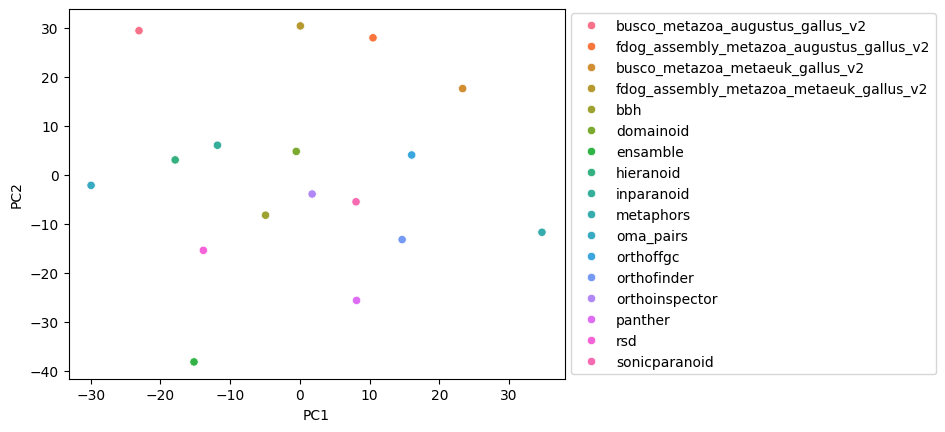

In [48]:
results = pd.DataFrame()
results['tools'] = all_tools
results["PC1"] = df_embedded[:,0]
results["PC2"] = df_embedded[:,1]
print(results)

fig = sb.scatterplot(data=results, x="PC1", y="PC2", hue='tools')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# UMAP

In [24]:
!pip uninstall umap --yes
!pip install umap-learn

  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.4 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 31.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 1.0 MB/s eta 0:00:00eta 0:00:01
Using cached tqdm-4.66.2-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 19.1 MB/s eta 0:00:00:00:0100:01


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap

In [50]:
df_embedded= umap.UMAP(n_neighbors=15).fit_transform(df)
df_embedded.shape

(17, 2)

                                       tools       PC1        PC2
0           busco_metazoa_augustus_gallus_v2  5.253428  20.447077
1   fdog_assembly_metazoa_augustus_gallus_v2  3.743379  21.879101
2            busco_metazoa_metaeuk_gallus_v2  4.831043  20.859556
3    fdog_assembly_metazoa_metaeuk_gallus_v2  4.266375  21.519493
4                                        bbh  5.153430  19.706640
5                                  domainoid  3.909802  20.357161
6                                   ensamble  3.856313  19.604610
7                                  hieranoid  2.290477  20.442831
8                                 inparanoid  3.355963  20.748262
9                                  metaphors  3.045411  18.967276
10                                 oma_pairs  2.828970  20.815786
11                                 orthoffgc  4.282326  18.568598
12                               orthofinder  3.603648  19.002985
13                            orthoinspector  3.544592  18.294346
14        

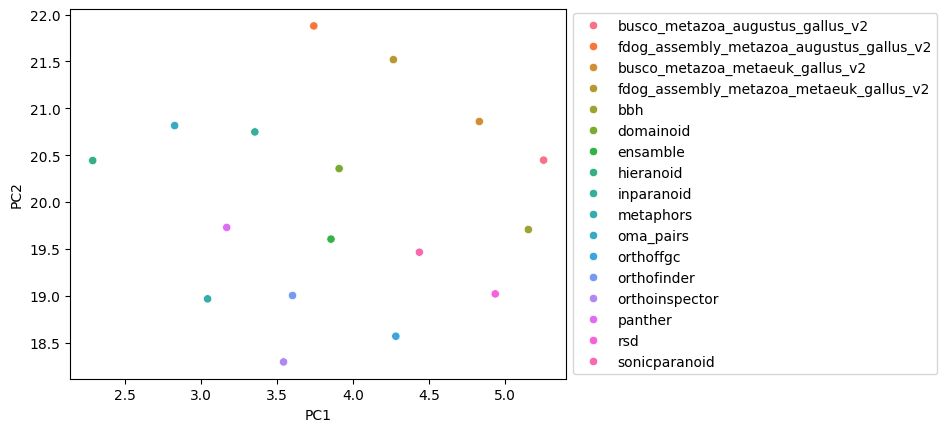

In [51]:
results = pd.DataFrame()
results['tools'] = all_tools
results["PC1"] = df_embedded[:,0]
results["PC2"] = df_embedded[:,1]
print(results)

fig = sb.scatterplot(data=results, x="PC1", y="PC2", hue='tools')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Heat map

In [52]:
test_df = pd.DataFrame({'A':[1,0,0,1], 'B':[1,1,0,0]}, index=['X','Y','Z','K'])
print(test_df)

   A  B
X  1  1
Y  0  1
Z  0  0
K  1  0


In [53]:
logical_and = test_df['A'] & test_df['B']
print(logical_and)

X    1
Y    0
Z    0
K    0
dtype: int64


In [54]:
#print(df.loc['busco_metazoa_augustus'])

In [55]:
def fill_nr_pairs_matrix(df, all_tools, normalize):
    dict_nr_pairs = {}
    for i in all_tools:
        nr_pairs_per_tool = []
        for j in all_tools:
            same_pairs = df.loc[i] & df.loc[j] 
            nr_shared_pairs = same_pairs.sum()
            if normalize == True:
                nr_og = df.loc[i].sum()
                nr_shared_pairs = nr_shared_pairs / nr_og
            nr_pairs_per_tool.append(nr_shared_pairs)
        dict_nr_pairs[i] = nr_pairs_per_tool
    
    df_nr_pairs = pd.DataFrame(dict_nr_pairs, index=all_tools, columns=all_tools)
    return df_nr_pairs
        

In [56]:
df_pairs = fill_nr_pairs_matrix(df,all_tools, False)
df_pairs.head()

,busco_metazoa_augustus_gallus_v2,fdog_assembly_metazoa_augustus_gallus_v2,busco_metazoa_metaeuk_gallus_v2,fdog_assembly_metazoa_metaeuk_gallus_v2,bbh,domainoid,ensamble,hieranoid,inparanoid,metaphors,oma_pairs,orthoffgc,orthofinder,orthoinspector,panther,rsd,sonicparanoid
busco_metazoa_augustus_gallus_v2,8567,7508,7753,7386,7791,7826,6836,7491,7553,7457,7125,7691,7974,7909,7625,7590,7919
fdog_assembly_metazoa_augustus_gallus_v2,7508,8232,7634,7697,7808,7889,6933,7551,7626,7485,7221,7662,8000,7966,7673,7647,7952
busco_metazoa_metaeuk_gallus_v2,7753,7634,8621,7891,8069,8133,7093,7769,7820,7754,7362,7953,8313,8214,7944,7864,8255
fdog_assembly_metazoa_metaeuk_gallus_v2,7386,7697,7891,8270,7783,7876,6937,7522,7588,7516,7160,7641,8030,7954,7641,7655,7930
bbh,7791,7808,8069,7783,8738,8552,7414,8162,8244,8028,7732,8301,8667,8703,8207,8405,8684


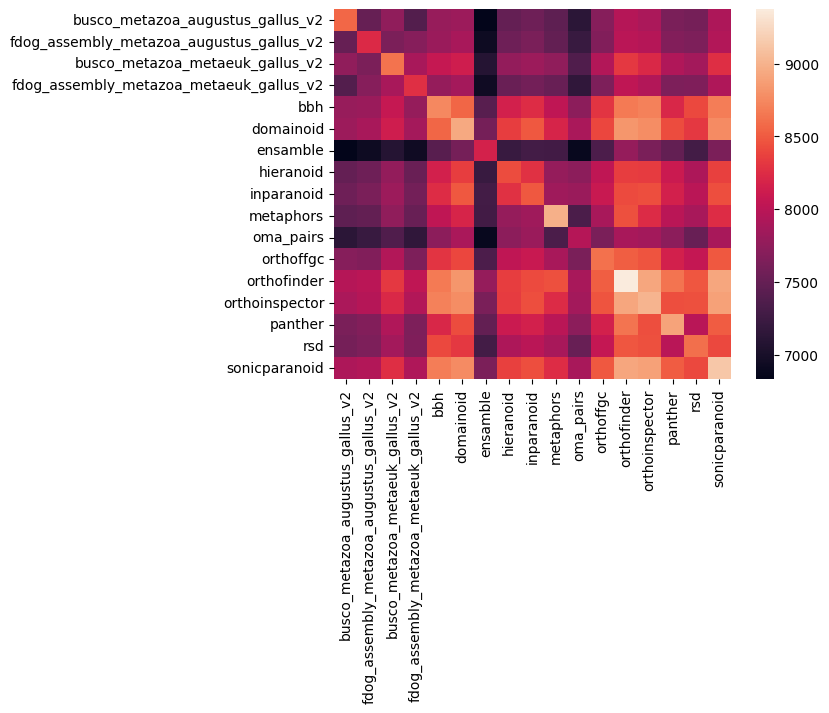

In [57]:
heatmap = sb.heatmap(df_pairs)

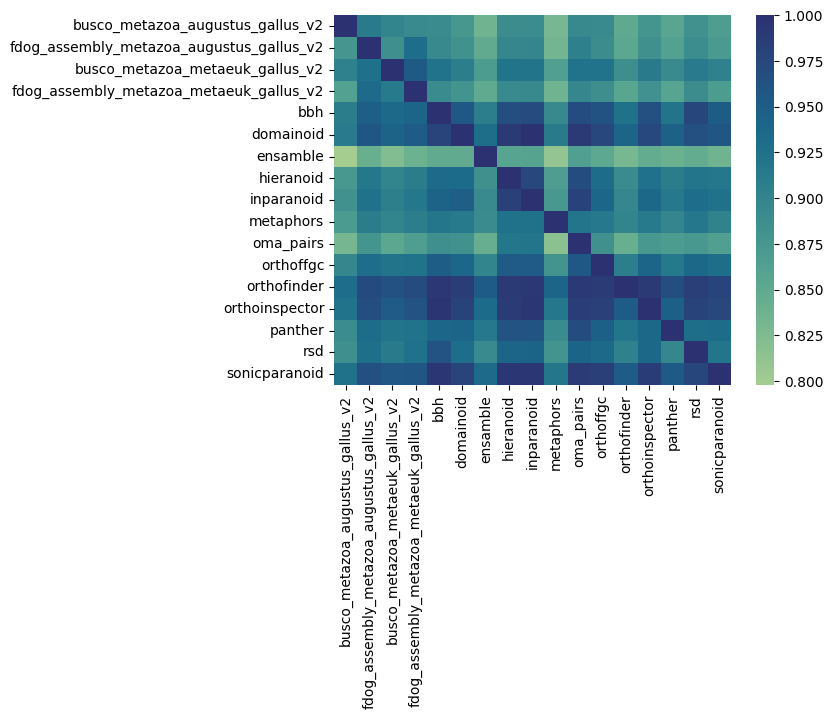

In [58]:
df_pairs_normalized = fill_nr_pairs_matrix(df,all_tools, True)
df_pairs.head()
heatmap = sb.heatmap(df_pairs_normalized, cmap="crest")

In [35]:
def filter_heatmap_data(df, tools_list, tools_ref):
    df_col = df.loc[tools_list].copy()
    filtered_df = df_col[tools_ref]
    return filtered_df
    

,bbh,domainoid,ensamble,hieranoid,inparanoid,metaphors,oma_pairs,orthoffgc,orthofinder,orthoinspector,panther,rsd,sonicparanoid
busco_metazoa_augustus_gallus_v2,0.891623,0.874902,0.836925,0.889456,0.889949,0.830493,0.893641,0.892642,0.850832,0.878192,0.856164,0.881943,0.867741
fdog_assembly_metazoa_augustus_gallus_v2,0.894827,0.882951,0.850024,0.897530,0.899493,0.834948,0.907061,0.890552,0.854460,0.885743,0.862452,0.889496,0.872452
busco_metazoa_metaeuk_gallus_v2,0.923438,0.909223,0.868389,0.922465,0.921409,0.863571,0.923366,0.923050,0.887004,0.912059,0.891983,0.913781,0.904558
fdog_assembly_metazoa_metaeuk_gallus_v2,0.871824,0.862158,0.828722,0.873427,0.874160,0.822586,0.878590,0.867108,0.838455,0.864091,0.839659,0.870439,0.850647


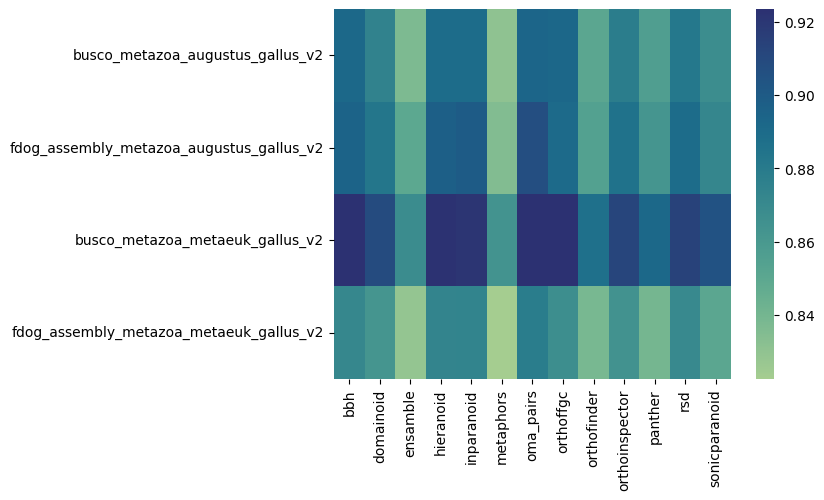

In [36]:
df_filtered = filter_heatmap_data(df_pairs_normalized, tools, tools_ref)
display(df_filtered)
heatmap = sb.heatmap(df_filtered, cmap="crest")

,bbh,domainoid,ensamble,hieranoid,inparanoid,metaphors,oma_pairs,orthoffgc,orthofinder,orthoinspector,panther,rsd,sonicparanoid
busco_metazoa_augustus_gallus_v2,7791,7826,6836,7491,7553,7457,7125,7691,7974,7909,7625,7590,7919
fdog_assembly_metazoa_augustus_gallus_v2,7819,7898,6943,7559,7634,7497,7232,7673,8008,7977,7681,7655,7962
busco_metazoa_metaeuk_gallus_v2,8069,8133,7093,7769,7820,7754,7362,7953,8313,8214,7944,7864,8255
fdog_assembly_metazoa_metaeuk_gallus_v2,7618,7712,6769,7356,7419,7386,7005,7471,7858,7782,7478,7491,7763


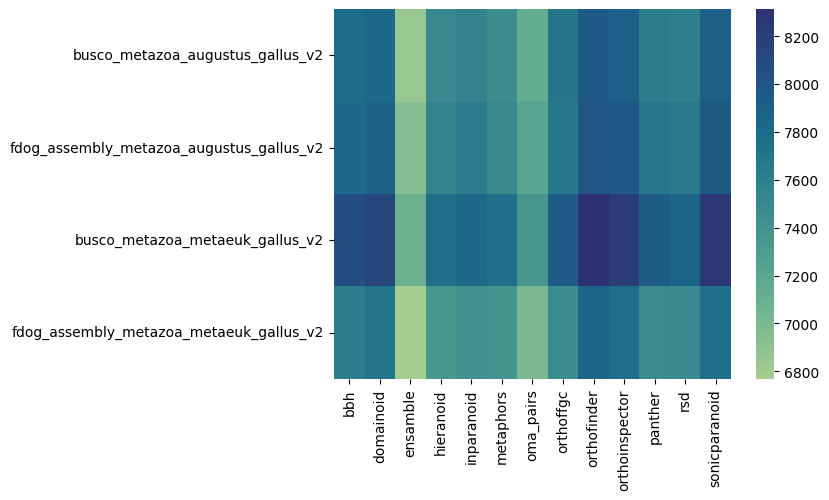

In [37]:
df_filtered = filter_heatmap_data(df_pairs, tools, tools_ref)
display(df_filtered)
heatmap = sb.heatmap(df_filtered, cmap="crest")

,bbh,domainoid,ensamble,hieranoid,inparanoid,metaphors,oma_pairs,orthoffgc,orthofinder,orthoinspector,panther,rsd,sonicparanoid
busco_metazoa_augustus_gallus_v2,0.891623,0.874902,0.836925,0.889456,0.889949,0.830493,0.893641,0.892642,0.850832,0.878192,0.856164,0.881943,0.867741
fdog_assembly_metazoa_augustus_gallus_v2,0.894827,0.882951,0.850024,0.897530,0.899493,0.834948,0.907061,0.890552,0.854460,0.885743,0.862452,0.889496,0.872452
busco_metazoa_metaeuk_gallus_v2,0.923438,0.909223,0.868389,0.922465,0.921409,0.863571,0.923366,0.923050,0.887004,0.912059,0.891983,0.913781,0.904558
fdog_assembly_metazoa_metaeuk_gallus_v2,0.871824,0.862158,0.828722,0.873427,0.874160,0.822586,0.878590,0.867108,0.838455,0.864091,0.839659,0.870439,0.850647


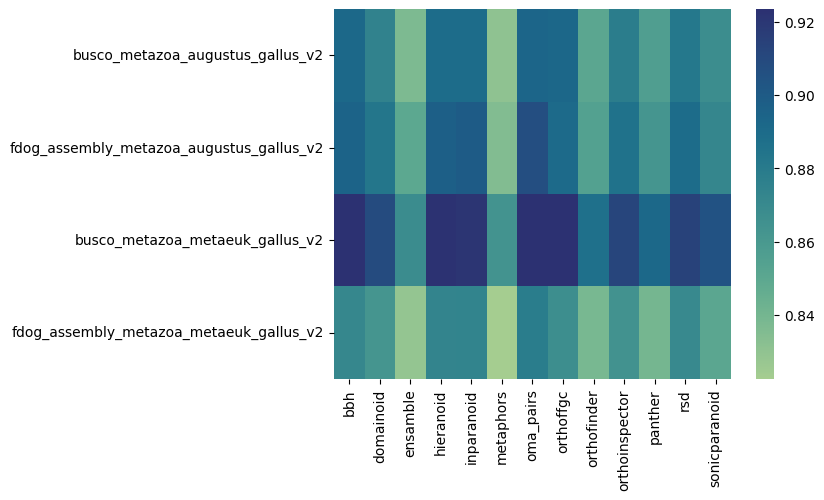

In [38]:
df_filtered = filter_heatmap_data(df_pairs_normalized, tools, tools_ref)
display(df_filtered)
heatmap = sb.heatmap(df_filtered, cmap="crest")